# **Assignment 2**
## **Convolutional Neural Networks (CNNS) for Image Classification**

In this assignment, we explore the capabilities of a popular deep learning architectures — Convolutional Neural Networks (CNNs) — by training them on various datasets and comparing their performance. While ANNs serve as a versatile model for a range of tasks, CNNs are specifically designed for handling spatial data, making them particularly effective for image classification problems. By evaluating these models, we aim to highlight their respective strengths, limitations, and suitability for different types of data, providing insights into their real-world applications.

====================================================================================================

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 1**
This block imports essential libraries needed for building and training a Convolutional Neural Network (CNN) with PyTorch, including data loading, transformations, and metrics for evaluation.
1) <blue>**torch**</blue>: The core PyTorch library, essential for all operations involving tensors, model creation, and training.
2) <blue>**torch.nn**</blue>: Contains modules to define neural network architectures.
3) <blue>**torch.optim**</blue>: Provides optimization algorithms like <green>**SGD (Stochastic Gradient Descent)**</green>, used during model training.
4) <blue>**torchvision.transforms**</blue>: A module for applying various image transformations, such as <green>**normalization**</green> or <green>**random cropping**</green>.
5) <blue>**DataLoader**</blue>: Used to efficiently load data in batches, critical for training deep learning models.
6) <blue>**sklearn.metrics**</blue>: Includes metrics to evaluate model performance, such as <green>**accuracy**</green> and <green>**precision**</green>.
7) <blue>**seaborn/matplotlib**</blue>: Libraries for <green>**visualization**</green>, typically used to visualize model performance metrics.


In [1]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 2**
This block configures the device (CPU or GPU) and applies data transformations to the images (conversion to tensors and normalization).
1) <blue>**torch.device**</blue>: Chooses the <green>**device**</green> to run computations on. If a <green>**GPU**</green> is available, the model will run on it; otherwise, it defaults to the CPU.
2) <blue>**transforms.Compose**</blue>: Combines multiple transformations to apply <green>**sequentially**</green> to the data.
3) <blue>**transforms.ToTensor()**</blue>: Converts the image from a <green>**PIL Image**</green> (or numpy array) to a PyTorch tensor.
4) <blue>**transforms.Normalize()**</blue>: Normalizes the pixel values of the image. Each <green>**channel (R, G, B)**</green> is normalized with a <blue>**mean**</blue> of <green>**0.5**</green> and a <blue>**standard deviation**</blue> of <green>**0.5**</green>, scaling the values to the range [-1, 1].

In [2]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the dataset
])

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 3**
This block is meant to load the CIFAR-10 dataset, though the actual dataset loading is marked as a TODO. It sets up data loaders for both the training and testing datasets.
1) <blue>**train_dataset/test_dataset**</blue>: These will eventually contain the training and testing datasets. The <blue>**torchvision.datasets.CIFAR10**</blue> class will likely be used here.
2) <blue>**train_loader**</blue>: Loads the training dataset in <blue>**batches**</blue> of <green>**64**</green> images and <green>**shuffles**</green> them to ensure randomness during training.
3) <blue>**test_loader**</blue>: Loads the test dataset in <blue>**batches**</blue> of <green>**64**</green> images but <green>**does not shuffle**</green> them since testing doesn't require randomization.

Note: Replace the placeholders **"None"** with the appropriate code to download the training and testing dataset.


In [3]:
# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:30<00:00, 5.55MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4** 
1) This code defines a simple <green>**feedforward artificial neural network (ANN)**</green> for classification.
2) The model has three fully connected layers <blue>**(fc1, fc2, fc3)**</blue>, and the final layer outputs predictions for <green>**10 classes** </green>.
3) The <green>**forward pass**</green> describes how the input data flows through the network
4) The input image is first <green>**flattened**</green>.
5) It passes through fully connected layers with <blue>**ReLU activation function**</blue>.

Note: Replace the placeholders **"None"** with the appropriate numbers of units and activation functions in each layer.

In [4]:
import torch.nn.functional as F

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)  # Input layer 
        self.fc2 = nn.Linear(512, 256)  # Hidden layer 
        self.fc3 = nn.Linear(256, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # Flatten the input image
        x = F.relu(self.fc1(x))  # First fully connected layer + relu activation
        x = F.relu(self.fc2(x))  # Second fully connected layer + relu activation
        x = self.fc3(x)  # Output layer
        return x


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
1) The <blue>**ANN model**</blue> is instantiated and moved to the <green>**selected device (CPU or GPU)**</green>.
2) The loss function is set to <blue>**CrossEntropyLoss**</blue>, which is suitable for <green>**multi-class classification**</green> problems like in our case of CIFAR-10.
3) The optimizer is <blue>**Adam**</blue>, with a <blue>**learning rate**</blue> of <green>**0.001**</green>, used to adjust the model parameters during training based on gradients computed from the loss.

In [5]:
# Initialize the ANN model, loss function, and optimizer
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.001)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code trains the neural network over a specified number of epochs (num_epochs).
For each batch of images and labels, the following steps are performed:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU or GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute the <green>**output predictions**</green>.
3) <blue>**Loss Calculation**</blue>: The loss between the predictions and true labels is computed and added to <blue>**ls_losses**</blue> for tracking.
4) <blue>**Backpropagation and Optimization**</blue>: Gradients are calculated using backpropagation, and the optimizer <green>**updates the model parameters**</green> based on these gradients.

Every 100 batches, the loss is printed to monitor training progress.

In [6]:
# Training loop
num_epochs = 5
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_ann(images)
        loss = criterion(outputs, labels)
        ls_losses.append(loss.detach().cpu().numpy())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/782], Loss: 1.7608
Epoch [1/5], Step [200/782], Loss: 1.4667
Epoch [1/5], Step [300/782], Loss: 1.6499
Epoch [1/5], Step [400/782], Loss: 1.6782
Epoch [1/5], Step [500/782], Loss: 1.5412
Epoch [1/5], Step [600/782], Loss: 1.6327
Epoch [1/5], Step [700/782], Loss: 1.3880
Epoch [2/5], Step [100/782], Loss: 1.4291
Epoch [2/5], Step [200/782], Loss: 1.6826
Epoch [2/5], Step [300/782], Loss: 1.2092
Epoch [2/5], Step [400/782], Loss: 1.6358
Epoch [2/5], Step [500/782], Loss: 1.5023
Epoch [2/5], Step [600/782], Loss: 1.5395
Epoch [2/5], Step [700/782], Loss: 1.4436
Epoch [3/5], Step [100/782], Loss: 1.4427
Epoch [3/5], Step [200/782], Loss: 1.3666
Epoch [3/5], Step [300/782], Loss: 1.3061
Epoch [3/5], Step [400/782], Loss: 1.3600
Epoch [3/5], Step [500/782], Loss: 1.4054
Epoch [3/5], Step [600/782], Loss: 1.1563
Epoch [3/5], Step [700/782], Loss: 1.0353
Epoch [4/5], Step [100/782], Loss: 1.2728
Epoch [4/5], Step [200/782], Loss: 1.1824
Epoch [4/5], Step [300/782], Loss:

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
1) This code plots the <blue>**training losses**</blue> that were recorded in <blue>**ls_losses**</blue> during training.
2) The <blue>**x-axis**</blue> represents the <green>**number of samples (batches)**</green> seen during training, and the <blue>**y-axis**</blue> shows the <green>**corresponding loss**</green>.
3) It provides a visual representation of how the <green>**model's loss decreases over time**</green>, indicating whether the training is progressing well.

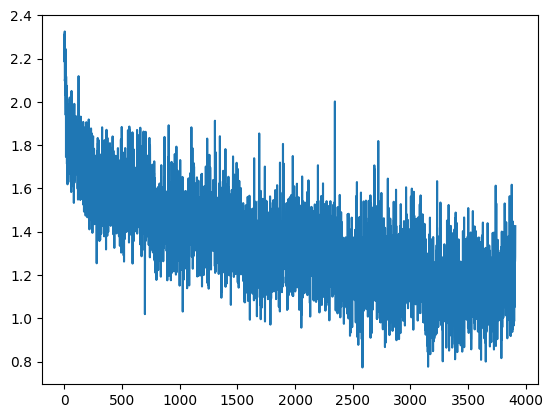

In [7]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This block evaluates the model on the test dataset.\
<blue>**model.eval()**</blue> sets the model to <green>**evaluation mode**</green>, disabling dropout layers and stopping the computation of gradients to save memory and speed up computations.
For each batch of test images:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU/GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute <green>**predictions**</green>.
3) <blue>**Storing Results**</blue>: Predictions and true labels are saved to <green>**calculate metrics**</green> later.

This code also calculates key performance metrics to evaluate the model:
1) <blue>**Accuracy**</blue>: Percentage of correctly classified samples.
2) <blue>**Precision**</blue>: Proportion of true positive predictions out of all positive predictions.
3) <blue>**Recall**</blue>: Proportion of true positives out of actual positive samples.
4) <blue>**F1-Score**</blue>: <green>**Harmonic mean**</green> of precision and recall.
5) The <blue>**confusion matrix**</blue> is also calculated, showing the number of correct and incorrect predictions for each class. It is visualized using a <green>**heatmap**</green>, where the <blue>**rows**</blue> represent <green>**true labels**</green>, and the <blue>**columns**</blue> represent <green>**predicted labels**</green>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [8]:
# Test the model
model_ann.eval()
all_preds_ann = []
all_labels_ann = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_ann(images) 
        
        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

accuracy_ann = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann = precision_score(all_labels_ann, all_preds_ann, average='macro')
recall_ann = recall_score(all_labels_ann, all_preds_ann, average='macro')
f1_ann = f1_score(all_labels_ann, all_preds_ann, average='macro')

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall: {recall_ann:.4f}")
print(f"ANN F1-Score: {f1_ann:.4f}")


ANN Accuracy: 0.5219
ANN Precision: 0.5247
ANN Recall: 0.5219
ANN F1-Score: 0.5173


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 9**
This block defines a simple Convolutional Neural Network (CNN) architecture using PyTorch. The model will consist of convolutional layers, activation functions, pooling layers, and fully connected layers to classify images from the CIFAR-10 dataset.
1) <blue>**class CNN(nn.Module)**</blue>: This defines a custom CNN class that inherits from PyTorch's nn.Module, the base class for all neural networks in PyTorch.
2) <blue>**self.conv**</blue>: These define the two convolutional layers. The first takes an <blue>**input**</blue> with <green>**3 channels (RGB)**</green> and produces <green>**32**</green> <blue>**feature maps**</blue>. The second takes <green>**32**</green> <blue>**input channels**</blue> and produces <green>**64**</green> <blue>**feature maps**</blue>.
3) <blue>**self.pool**</blue>: A max-pooling layer that reduces the size of the feature maps by <green>**half (downsampling)**</green>. It takes the maximum value over a <green>**2x2**</green> <blue>**grid**</blue> with a <blue>**stride**</blue> of <green>**2**</green>.
4) <blue>**self.fc**</blue>: Fully connected layers. The first layer takes the flattened feature maps from the convolutional layers as input and <blue>**outputs**</blue> <green>**512**</green> features. The second layer maps the <green>**512**</green> <blue>**features**</blue> to <green>**10**</green> <blue>**output classes**</blue> (for the 10 CIFAR-10 categories).
5) <blue>**forward(self, x)**</blue>: This function defines how data flows through the network. It applies the convolutional layers, pooling, and fully connected layers in sequence.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  
        self.fc1 = nn.Linear(64*8*8, 512) 
        self.fc2 = nn.Linear(512, 10)  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 64*8*8)  
        x = F.relu(self.fc1(x))  
        x = self.fc2(x)  
        return x


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 10**
This block defines the training loop for the CNN model. It will train the model over multiple epochs, compute the loss using cross-entropy, and optimize the model using an optimizer like SGD.
1) <blue>**optimizer.zero_grad()**</blue>: <green>**Clears**</green> the <blue>**gradients**</blue> from the previous iteration to prevent accumulation.
2) <blue>**loss.backward()**</blue>: Computes the <blue>**gradients**</blue> via <green>**backpropagation**</green>.
3) <blue>**optimizer.step()**</blue>: Updates the model's parameters based on the <green>**computed gradients**</green>.
4) <blue>**running_loss**</blue>: Keeps track of the <blue>**cumulative loss**</blue> for the epoch, which is divided by the <green>**number of batches**</green> to return the <blue>**average loss**</blue>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [10]:
# Initialize the CNN model, loss function, and optimizer
model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/782], Loss: 1.5892
Epoch [1/5], Step [200/782], Loss: 1.2780
Epoch [1/5], Step [300/782], Loss: 1.4650
Epoch [1/5], Step [400/782], Loss: 1.1593
Epoch [1/5], Step [500/782], Loss: 1.2137
Epoch [1/5], Step [600/782], Loss: 1.1464
Epoch [1/5], Step [700/782], Loss: 0.8466
Epoch [2/5], Step [100/782], Loss: 0.7109
Epoch [2/5], Step [200/782], Loss: 0.8926
Epoch [2/5], Step [300/782], Loss: 0.6412
Epoch [2/5], Step [400/782], Loss: 1.0898
Epoch [2/5], Step [500/782], Loss: 0.8682
Epoch [2/5], Step [600/782], Loss: 0.6257
Epoch [2/5], Step [700/782], Loss: 0.7831
Epoch [3/5], Step [100/782], Loss: 0.7670
Epoch [3/5], Step [200/782], Loss: 0.7852
Epoch [3/5], Step [300/782], Loss: 0.5681
Epoch [3/5], Step [400/782], Loss: 0.4864
Epoch [3/5], Step [500/782], Loss: 0.4889
Epoch [3/5], Step [600/782], Loss: 0.4980
Epoch [3/5], Step [700/782], Loss: 0.5798
Epoch [4/5], Step [100/782], Loss: 0.5631
Epoch [4/5], Step [200/782], Loss: 0.4925
Epoch [4/5], Step [300/782], Loss:

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 11**
This code performs evaluation on the test set by moving data to the appropriate device, running the model to get predictions, and then calculating key performance metrics using the predicted and actual labels.
1) <blue>**model_cnn.eval()**</blue>: The code begins by setting the model to <green>**evaluation mode**</green> to ensure proper inference behavior.
2) <blue>**all_preds_cnn, all_labels_cnn**</blue>: These lists are initialized to store <green>**predicted**</green> and <green>**true labels**</green>, respectively.
3) <blue>**torch.no_grad()**</blue>: This is used to <green>**disable gradients**</green>, save memory and speed up computations, the test set is processed in batches from test_loader, where both images and labels are moved to the correct device.
6) After processing the test set, evaluation metrics such as <blue>**accuracy**</blue>, <blue>**precision**</blue>, <blue>**recall**</blue>, and <blue>**F1-score**</blue> are calculated.
7) Finally, the results are printed to display the performance of the CNN model

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [12]:
# Test the CNN model
model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

accuracy_cnn = accuracy_score(all_labels_cnn, all_preds_cnn)
precision_cnn = precision_score(all_labels_cnn, all_preds_cnn, average='macro') 
recall_cnn = recall_score(all_labels_cnn, all_preds_cnn, average='macro') 
f1_cnn = f1_score(all_labels_cnn, all_preds_cnn, average='macro') 

print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1-Score: {f1_cnn:.4f}")


CNN Accuracy: 0.7346
CNN Precision: 0.7373
CNN Recall: 0.7346
CNN F1-Score: 0.7304


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 12**
This code block compares performance of the trained ANN and CNN models, showing which one performs better.
1) <blue>**import pandas as pd**</blue>: The code starts by importing the <green>**Pandas library**</green>, which is used for data manipulation and creation of a comparison table.
2) <blue>**data dictionary**</blue>: A dictionary is defined with the keys 'Model', 'Accuracy', 'Precision', 'Recall', and 'F1-Score', containing <green>**placeholders (None)**</green> for both the 'ANN' and 'CNN' models. These placeholders will later hold the actual performance metrics.
3) <blue>**pd.DataFrame(data)**</blue>: The dictionary is converted into a <green>**Pandas DataFrame**</green>, which provides a tabular structure for easy comparison of the metrics between the two models.
4) <blue>**print(df_comparison)**</blue>: This line prints the <green>**comparison table**</green> of ANN and CNN metrics, enabling a visual representation of their performance.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [13]:
import pandas as pd

data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [accuracy_ann, accuracy_cnn],
    'Precision': [precision_ann, precision_cnn],
    'Recall': [recall_ann, recall_cnn],
    'F1-Score': [f1_ann, f1_cnn]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)

  Model  Accuracy  Precision  Recall  F1-Score
0   ANN    0.5219   0.524707  0.5219  0.517255
1   CNN    0.7346   0.737259  0.7346  0.730368
